<a href="https://colab.research.google.com/github/mohamedamr13/gmc/blob/main/DataVizProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Preprocessing phase.


In [9]:
df = pd.read_csv('titanic-passengers.csv' , sep = ';')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 343;No;2;Collander to 428;Yes;2;"Phillips
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked  891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [18]:
df['Survived'].describe()
df['Age'].isnull().sum()
# df['Age'].fillna( df['Age'].mean() , inplace = True  )


0

In [22]:
n = df['Cabin'].isnull().sum()
df['Cabin'].describe()


891

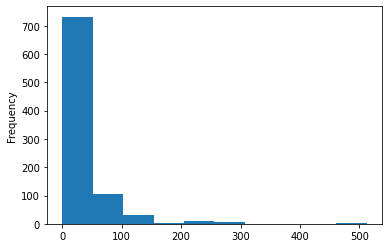

In [34]:
fare = df['Fare']
df['Fare'].describe()
# sns.boxplot(df['Fare'])
# sns.countplot( x = 'Fare' , data = df )
bins = [ 0 , 2 , 4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20 , 22 , 24 , 26 , 28 ]
fare.plot.hist( )


2 . Data Visualization

* Relation between Age/Sex and Survival *

In [40]:
df['Survived'].describe()
nums = { 'Survived' : {  "Yes" : 1 , "No" : 0 } }
# df.replace( nums , inplace = True )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


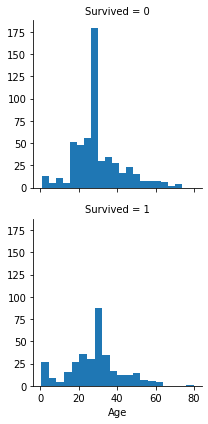

In [67]:
grid = sns.FacetGrid(df, row="Survived")
grid.map(plt.hist, 'Age' , bins = 20)


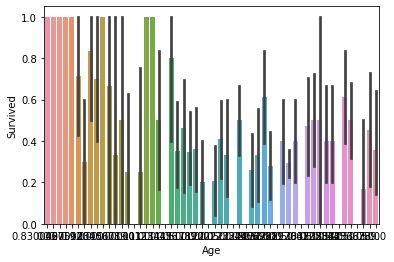

In [80]:
l = df[ df['Age'] < 40 ]
sns.barplot( x = 'Age' , y = 'Survived' , data = l)


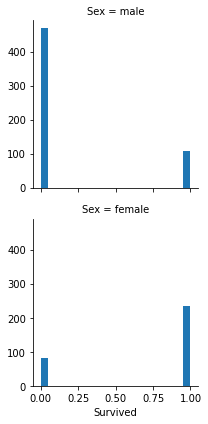

In [69]:
grid = sns.FacetGrid(df, row="Sex")
grid.map(plt.hist, 'Survived' , bins = 20)


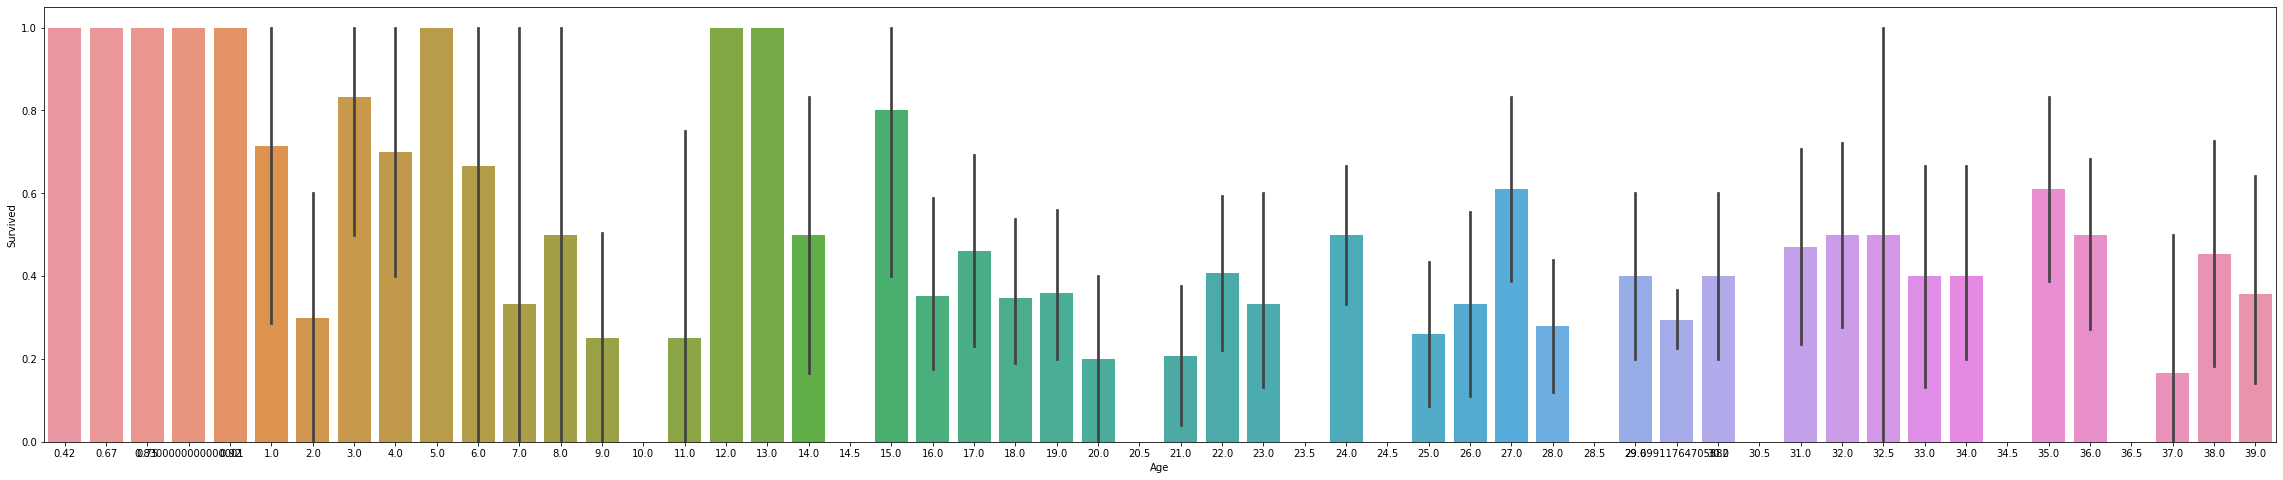

In [81]:
fig_dims = (40, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Age", y = "Survived", ax=ax, data=l)

Relation between Fare and Survival


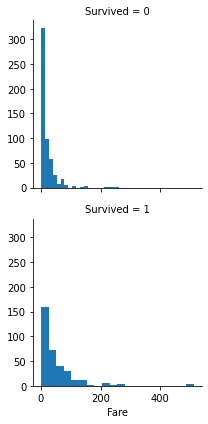

In [88]:
grid = sns.FacetGrid(df, row="Survived")
grid.map(plt.hist, 'Fare' , bins = 20)


Relation between Class and survival


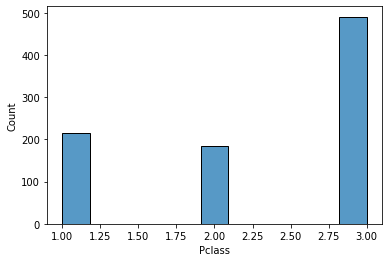

In [95]:
sns.histplot( x = 'Pclass' , data = df)

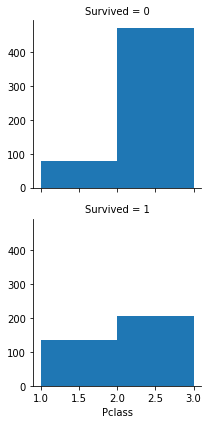

In [97]:
grid = sns.FacetGrid(df, row="Survived")
grid.map(plt.hist, 'Pclass' , bins = 2)


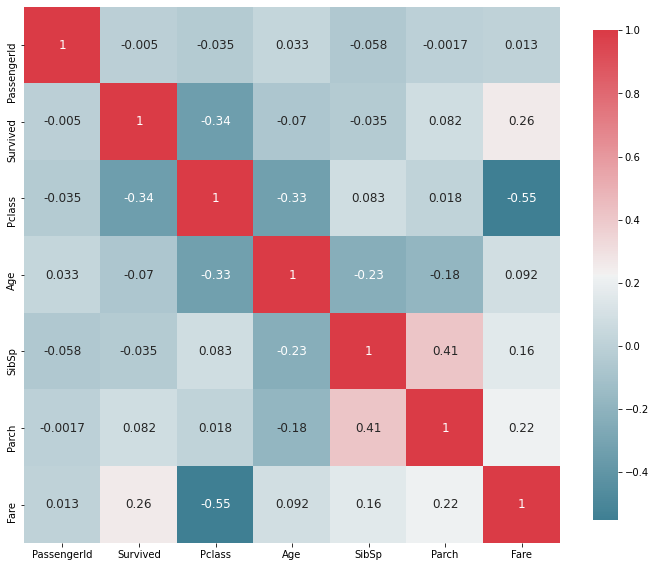

In [99]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)

It shows the degree of corelation and whether the corelation is positive or negative between all the columns in a table 


Relation between Class and survival rate

In [108]:
df[['Survived','Pclass']].groupby(['Pclass'], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363
